In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime, timedelta
from functools import reduce

df = pd.read_csv("D:\\lab\\奧丁丁\\OwlTing_整合資料\\csv\\final_data.csv")

In [2]:
# 沒有空值
# df.isna().sum()

In [3]:
def split_room_floor(x):
    # 避免空字串, https://stackoverflow.com/questions/30933216/split-by-regex-without-resulting-empty-strings-in-python?lq=1
    return list(filter(None, re.split(r'(\d+)', x)))

# 嘗試切割房型成[樓層, 房名]
df.room_name.dropna().apply(split_room_floor)

0         [301, 米妮童話屋四人房]
1          [201, 森林主題四人房]
2          [201, 森林主題四人房]
3                   [雙人房]
4          [201, 森林主題四人房]
5         [301, 米妮童話屋四人房]
6                   [雙人房]
7          [201, 森林主題四人房]
8            [302, 老皮四人房]
9                   [雙人房]
10                  [雙人房]
11                  [雙人房]
12           [302, 老皮四人房]
13           [302, 老皮四人房]
14                  [雙人房]
15                  [雙人房]
16                  [雙人房]
17         [201, 森林主題四人房]
18                  [雙人房]
19               [浪漫雙人套房]
20               [典雅雙人套房]
21               [喜悅家庭套房]
22               [浪漫雙人套房]
23               [典雅雙人套房]
24               [典雅雙人套房]
25               [浪漫雙人套房]
26               [喜悅家庭套房]
27             [幸福家庭和式套房]
28             [幸福家庭和式套房]
29               [典雅雙人套房]
               ...       
176033           [B房雙人套房]
176034           [B房雙人套房]
176035           [B房雙人套房]
176036           [B房雙人套房]
176037           [B房雙人套房]
176038           [B房雙人套房]
176039           [B房雙人套房]
176040      

In [4]:
# TODO: 用plotly畫飯店分布

# TODO: 飯店設備與房型做oneHot來觀察


In [5]:
# 獨立的電話號碼/ 顧客人數
df['user_id(phone)'].unique().shape

# 藉由電話找出重複訂購的顧客 
df['user_id(phone)'].value_counts()

3587b8b77615d1f19af9f0ae963ffa5775344d5a    7158
b6589fc6ab0dc82cf12099d1c2d40ab994e8410c    2978
4b581cdce6283495fd4934ce574ac47e92881c64    1673
66f5fc89b6242c4b065ca27aef54104333af2b03     875
8aefb06c426e07a0a671a1e2488b4858d694a730     825
fb96549631c835eb239cd614cc6b5cb7d295121a     698
356a192b7913b04c54574d18c28d46e6395428ab     668
17ba0791499db908433b80f37c5fbc89b870084b     557
829a33481e659a7d52f73be2e3df743d6067903c     500
483dd19dc34bdfa5332a07264ab687b03aceb87a     488
40bd001563085fc35165329ea1ff5c5ecbdbbeef     400
3bc15c8aae3e4124dd409035f32ea2fd6835efc9     393
ddd73219b05ee82d4a3acabad5c94ef45cbf02fc     308
4ad2b73f9fb7dd356c622dc61aea383a2309fa8c     299
f4b335a9bf103db4f3c5c78bc85b2c45ebd37fcb     291
bff960d837b0be8923a463975dccb1c94d2106a0     253
8104ba1dc0409b259f487ed07db477c38f205a30     234
3a52ce780950d4d969792a2559cd519d7ee8c727     213
6934105ad50010b814c933314b1da6841431bc8b     201
0f58d5a5515f1a8a9d179aa58858b67b2f8a3388     198
adc05cdac19661a1dd25

In [6]:
# 查某間飯店的住房紀錄
df.loc[df.hotel_id == 1014].head()

,hotel_id,hotel_name,user_id(phone),plan_id,room_id,order_created_at,plan_name,room_name,order_total,start_date,...,order_created_month,order_created_year,time_until_checkin,price_per_night/person,country,city,latitude,longitude,people,unit_price
70817,1014,Mr.Lee民宿,22e4d375d5119c6f546e95ca684dd643062d2b49,1460,4485,2018-08-02 08:05:16,官網訂房優惠專案,雙人房2-1,1600.0,2018-08-05 00:00:00,...,8.0,2018.0,2 days 15:54:44.000000000,800.0,台灣,花蓮縣,23.969264,121.591132,2,1600.0
70818,1014,Mr.Lee民宿,f93dc168b5f15ec78f01ac60c72a564d1829bcc9,1460,4485,2018-08-02 10:02:59,官網訂房優惠專案,雙人房2-1,1800.0,2018-08-04 00:00:00,...,8.0,2018.0,1 days 13:57:01.000000000,800.0,台灣,花蓮縣,23.969264,121.591132,2,1600.0
70819,1014,Mr.Lee民宿,80c817a452ae6734d98980b3d9670629697b4da7,1461,4486,2018-08-02 12:20:02,平台專案,四人房2-2,0.0,2018-08-04 00:00:00,...,8.0,2018.0,1 days 11:39:58.000000000,625.0,台灣,花蓮縣,23.969264,121.591132,4,2500.0
70820,1014,Mr.Lee民宿,c475418be72455369ba88f537fdc45c4566c3ff4,1461,4490,2018-08-09 02:48:03,平台專案,四人房3-3,0.0,2018-09-22 00:00:00,...,8.0,2018.0,43 days 21:11:57.000000000,625.0,台灣,花蓮縣,23.969264,121.591132,4,2500.0
70821,1014,Mr.Lee民宿,109a2d9daef567ae4925d489b3879b7ae3c26979,1461,4491,2018-08-09 15:02:04,平台專案,雙人房4-1,0.0,2018-09-22 00:00:00,...,8.0,2018.0,43 days 08:57:56.000000000,900.0,台灣,花蓮縣,23.969264,121.591132,2,1800.0


In [7]:
df2 = pd.read_csv("D:\\lab\\奧丁丁\\OwlTing_整合資料\\csv\\Room.csv", sep = ';')
# Room table裡面有幾個room_id, 約9000間房間
len(df2.id.unique())
# df2.id.value_counts()

8870

In [8]:
df3 = pd.read_csv("D:\\lab\\奧丁丁\\OwlTing_整合資料\\csv\\data.csv")

# 整理成雙欄index
room_count = df3.groupby(['hotel_id', 'room_id']).agg('count')
# 各hotel有幾間房
room_count.groupby(level=0).size().sort_values(ascending=False)

# 被住過間數, 3819間
len(df3.room_id.unique())

3819

In [9]:
# 平均一筆訂單住幾晚
df.night_amount.sum()/ len(df)

1.3572187228435275

In [10]:
# 最早跟最晚的住房日期
min(df.start_date.astype('datetime64').unique())
# 以下意思一樣
# min(df.start_date.astype('datetime64'))
# min(df.start_date)
max(df.start_date.astype('datetime64').unique())

numpy.datetime64('2020-08-28T00:00:00.000000000')

In [11]:
# 每間房間最早跟最晚的住宿日期
df.groupby('room_id')['start_date'].agg(['first','last']).reset_index().head()

,room_id,first,last
0,1819,2018-08-10 00:00:00,2019-06-25 00:00:00
1,1821,2018-07-11 00:00:00,2019-07-15 00:00:00
2,1822,2018-08-18 00:00:00,2019-03-01 00:00:00
3,1823,2018-07-27 00:00:00,2018-09-21 00:00:00
4,1824,2018-12-13 00:00:00,2019-08-27 00:00:00


In [12]:
# 住宿日期的範圍，沒設timedelta的話RAM容易爆炸
d_range = np.arange(min(df.start_date.astype('datetime64')),max(df.start_date.astype('datetime64')), timedelta(days=1))
# 哪幾天完全沒住人
sorted(set(d_range) - set(df.start_date.astype('datetime64')))[:10]

[numpy.datetime64('2018-06-05T00:00:00.000000'),
 numpy.datetime64('2018-06-06T00:00:00.000000'),
 numpy.datetime64('2018-06-07T00:00:00.000000'),
 numpy.datetime64('2018-06-08T00:00:00.000000'),
 numpy.datetime64('2018-06-09T00:00:00.000000'),
 numpy.datetime64('2018-06-10T00:00:00.000000'),
 numpy.datetime64('2018-06-11T00:00:00.000000'),
 numpy.datetime64('2018-06-12T00:00:00.000000'),
 numpy.datetime64('2018-06-13T00:00:00.000000'),
 numpy.datetime64('2018-06-14T00:00:00.000000')]

In [13]:
# 各房間有住人的起始日期
df_stay = df.set_index(['room_id', 'start_date']).sort_index()
# multi-index會回傳tuple
df_stay.index[0]
# 第一層index
# df.set_index(['room_id', 'start_date']).sort_index().index.get_level_values(0)
# 某room曾被住過的所有日期, xs()可以取multi-index
df_stay.xs(df_stay.index[0][0])

,hotel_id,hotel_name,user_id(phone),plan_id,order_created_at,plan_name,room_name,order_total,end_date,source,...,order_created_month,order_created_year,time_until_checkin,price_per_night/person,country,city,latitude,longitude,people,unit_price
start_date,,,,,,,,,,,,,,,,,,,,,
2018-08-10 00:00:00,166,風車花園城堡民宿,f9c39219f98b81df2d654ce2ae98cb3a632b9e3b,200,2018-07-15 04:42:03,訂房平台價格,雙人房,2142.0,2018-08-11 00:00:00,ota,...,7.0,2018.0,25 days 19:17:57.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0
2018-08-18 00:00:00,166,風車花園城堡民宿,cf9a65e2c5a141ebfe0e0c35fead486764d8a0b2,200,2018-08-14 01:27:02,訂房平台價格,雙人房,6800.0,2018-08-19 00:00:00,ota,...,8.0,2018.0,3 days 22:32:58.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0
2018-09-21 00:00:00,166,風車花園城堡民宿,4ce93d480dca74d577406f70132c8e043d25bef5,200,2018-09-02 08:14:02,訂房平台價格,雙人房,0.0,2018-09-22 00:00:00,ota,...,9.0,2018.0,18 days 15:45:58.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0
2019-03-01 00:00:00,166,風車花園城堡民宿,3587b8b77615d1f19af9f0ae963ffa5775344d5a,200,2019-02-28 05:38:03,訂房平台價格,雙人房,3800.0,2019-03-02 00:00:00,ota,...,2.0,2019.0,0 days 18:21:57.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0
2019-06-07 00:00:00,166,風車花園城堡民宿,014bad22c98241624fba13a0f193df20f6df6dc8,200,2019-05-27 13:58:03,訂房平台價格,雙人房,3060.0,2019-06-08 00:00:00,ota,...,5.0,2019.0,10 days 10:01:57.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0
2019-06-07 00:00:00,166,風車花園城堡民宿,3587b8b77615d1f19af9f0ae963ffa5775344d5a,200,2019-06-03 01:53:03,訂房平台價格,雙人房,3060.0,2019-06-08 00:00:00,ota,...,6.0,2019.0,3 days 22:06:57.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0
2019-06-25 00:00:00,166,風車花園城堡民宿,bd5e5eb049f3907175f54f5a571ba6b9fdea36ab,503,2019-06-25 01:57:25,官網訂房優惠,雙人房,3600.0,2019-06-26 00:00:00,notsure,...,6.0,2019.0,-1 days +22:02:35.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0
2019-12-29 00:00:00,166,風車花園城堡民宿,f1ed1e676e23f4ca45e812996c48fd670f2b8af7,200,2018-09-16 12:30:02,訂房平台價格,雙人房,0.0,2019-12-31 00:00:00,ota,...,9.0,2018.0,468 days 11:29:58.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0
2019-12-29 00:00:00,166,風車花園城堡民宿,f1ed1e676e23f4ca45e812996c48fd670f2b8af7,200,2018-09-16 12:30:05,訂房平台價格,雙人房,0.0,2019-12-31 00:00:00,ota,...,9.0,2018.0,468 days 11:29:55.000000000,1800.0,台灣,宜蘭縣,24.655074,121.75346,2,3600.0


In [14]:
# 每間房被住過幾次
room_stays = df.groupby('room_id')['start_date'].agg('count')
# 各房間的住房率(分母是交易總日數，要考慮一筆訂單住幾晚)
howManydays = max(df.start_date.astype('datetime64')) - min(df.start_date.astype('datetime64'))
stay_rate = room_stays/ howManydays.days
stay_rate.sort_values(ascending=False)[:20]

room_id
4529    2.373006
4533    1.693252
5357    1.450307
3646    1.436810
3887    1.433129
4531    1.373006
6289    1.358282
5358    1.170552
6278    1.103067
6197    1.074847
3645    0.990184
3314    0.877301
3838    0.866258
3312    0.855215
5476    0.851534
6444    0.836810
3036    0.835583
4371    0.795092
3313    0.787730
5386    0.787730
Name: start_date, dtype: float64

In [15]:
# 顯示user是否住過
live = pd.crosstab(df['hotel_id'], df['user_id(phone)'])
# 每間飯店有多少user住過
live.iloc[0].sort_values(ascending=False)
live.iloc[0].astype(bool).sum()
# 住過飯店的user數(過濾重複居住)
live.astype(bool).sum(axis=1)[:10] # 對row做sum

hotel_id
166     17
167    333
168    131
172    382
177     94
181    110
184    229
186    160
194    309
197    177
dtype: int64

In [16]:
# 飯店訂單數(不管單一人是否重複住)
df.groupby('hotel_id').agg('count')['user_id(phone)'].head(10)

hotel_id
166     19
167    729
168    207
172    581
177    120
181    222
184    287
186    226
194    430
197    236
Name: user_id(phone), dtype: int64

In [17]:
stay = pd.crosstab(df['start_date'], df['room_id'])
# 各房間哪時候沒住人，沒人住的時刻補0
r = pd.date_range(start=min(df.start_date.astype('datetime64')), end=max(df.start_date.astype('datetime64')))
stay.reindex(r).fillna(0.0).rename_axis('start_date').reset_index().head()

room_id,start_date,1819,1821,1822,1823,1824,1825,1826,1827,1828,...,7854,7860,7947,8026,8027,8028,8040,8121,8292,8407
0,2018-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-06-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-06-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# TODO: 調查room id何時空房
# 找值為0.0的日期


In [19]:
# 住過最多不同間飯店的user
live.astype(bool).sum().sort_values(ascending=False)

top_user = live.astype(bool).sum().sort_values(ascending=False).index
top_user[:10]
# 前面的user是否住過該飯店
# live.loc[:, top_user[:20]].astype(bool).T.values

Index(['3587b8b77615d1f19af9f0ae963ffa5775344d5a',
       '829a33481e659a7d52f73be2e3df743d6067903c',
       'b6589fc6ab0dc82cf12099d1c2d40ab994e8410c',
       '4ad2b73f9fb7dd356c622dc61aea383a2309fa8c',
       '4b581cdce6283495fd4934ce574ac47e92881c64',
       'ddd73219b05ee82d4a3acabad5c94ef45cbf02fc',
       '4ad4b6ebdda155afd09d5416c3d14c1c4e97b366',
       'fb96549631c835eb239cd614cc6b5cb7d295121a',
       '8aefb06c426e07a0a671a1e2488b4858d694a730',
       'f4cedd0a00692ca2ff20fda5120ecdb2ffcd3cdd'],
      dtype='object', name='user_id(phone)')

C:\Users\John\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


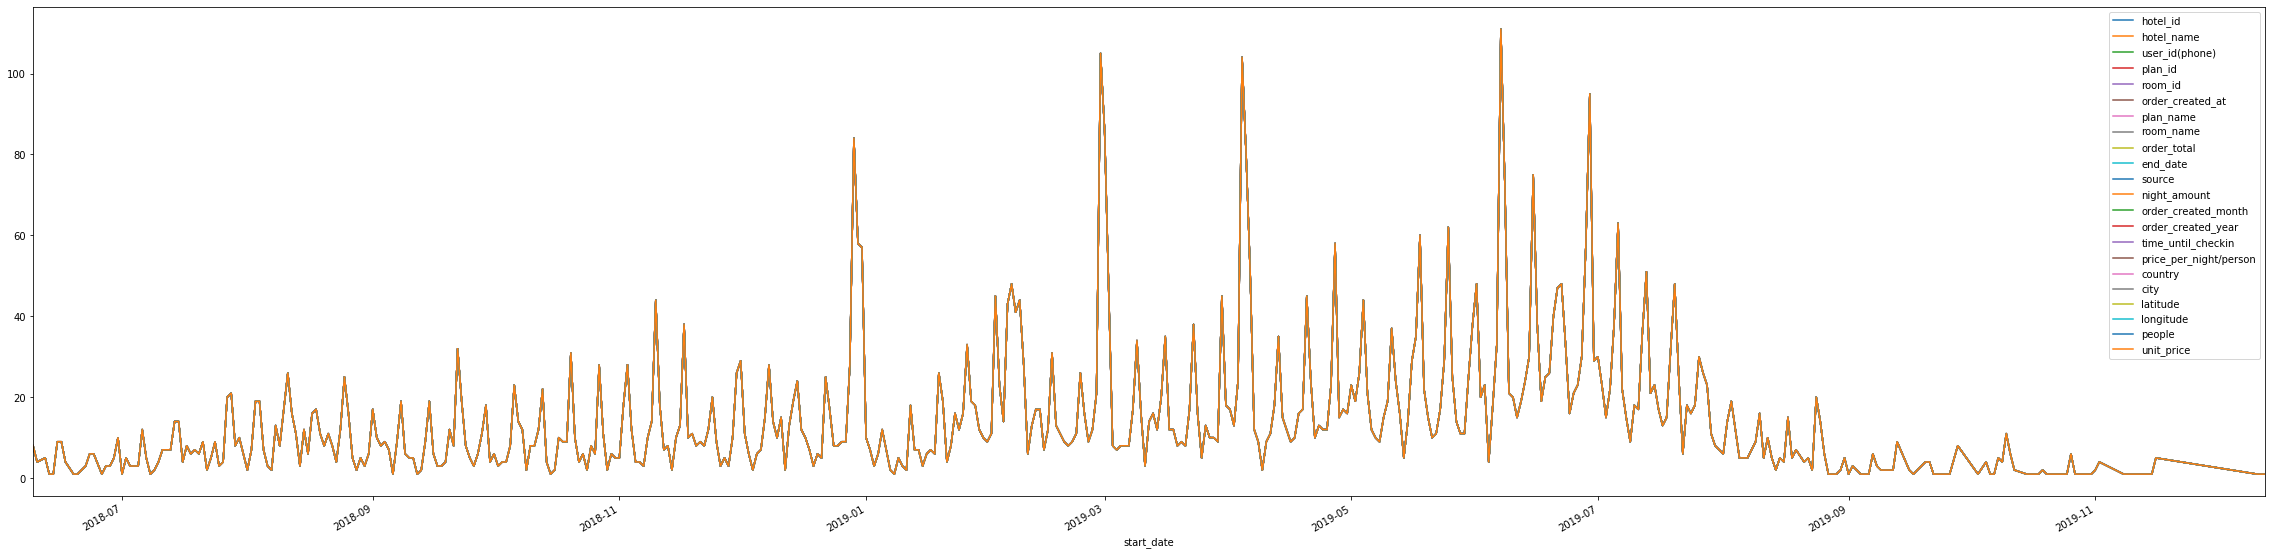

In [20]:
# 住過最多間飯店的使用者的住房量與時間關係
times = df.loc[df['user_id(phone)'] == top_user[0]]
times['start_date'] = times['start_date'].astype('datetime64[ns]')
times.groupby('start_date').count().plot(figsize=(40,10))
# times.groupby(times['start_date'].dt.month).count().plot(kind="bar")

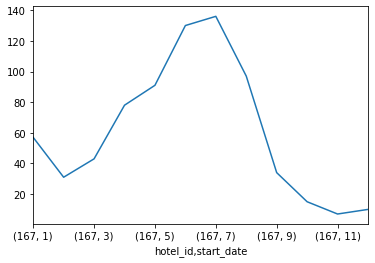

In [21]:
# 飯店住房數與日期間的關係圖
df['start_date'] = df['start_date'].astype('datetime64').dt.month
hotel_live_count = df.groupby(['hotel_id', 'start_date'])['hotel_name'].agg('count')
# 有哪些飯店id
hotel_set = list(set(hotel_live_count.index.get_level_values(0)))
# 取特定hotel的資料
hotel_live_count.iloc[hotel_live_count.index.get_level_values(0) == hotel_set[1]].plot()

In [22]:
def set_hotel_id(x):
    live_list = []
    for i, data in enumerate(x):
        if data:
            live_list.append(live.index[i])
        else:
            live_list.append(0)

    return live_list

# 共同住過哪幾間
reduce(np.intersect1d, (live.loc[:, top_user[:5]].astype(bool).apply(set_hotel_id).T.values))

array([   0,  536,  544,  671,  866, 1077, 1191, 1338, 1348, 1445, 1469,
       1535], dtype=int64)